In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("netflix.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'netflix.xls'

In [87]:
df.shape

(8807, 12)

In [88]:
df.rename(columns={'listed_in':'genere'},inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genere', 'description'],
      dtype='object')

In [89]:
df.drop(columns='show_id',inplace=True)

In [90]:
df.duplicated().sum()

0

In [91]:
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genere             0
description        0
dtype: int64

In [92]:
df.dropna(subset=['date_added'],inplace=True)
df['date_added'].isna().sum()

0

In [93]:
df.dropna(subset=['rating'],inplace=True)
df['rating'].isna().sum()

0

In [94]:
df.dropna(subset=['duration'],inplace=True)
df['rating'].isna().sum()

0

In [95]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      6169 non-null   object        
 3   cast          7965 non-null   object        
 4   country       7961 non-null   object        
 5   date_added    8702 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genere        8790 non-null   object        
 10  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.1+ KB


In [96]:
df.dropna(subset=['date_added'],inplace=True)
df['date_added'].isna().sum()

0

In [97]:
df['day']=df['date_added'].dt.day
df['month']=df['date_added'].dt.month
df['year']=df['date_added'].dt.year
df['month_name']=df['date_added'].dt.month_name()
df['weekdays']=df['date_added'].dt.day_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genere,description,day,month,year,month_name,weekdays
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [98]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [99]:
df['rating'] = df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df['rating'] = df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating'] = df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating'] = df['rating'].replace(['NR','UR'],np.nan)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genere,description,day,month,year,month_name,weekdays
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [100]:
df['rating'].unique()

array(['Teens', 'Adults', 'Kids', nan], dtype=object)

In [101]:
df['rating'].isna().sum()

81

In [102]:
df.dropna(subset=['rating'],inplace=True)
df['rating'].isna().sum()


0

In [103]:
df.isna().sum()

type               0
title              0
director        2535
cast             800
country          826
date_added         0
release_year       0
rating             0
duration           0
genere             0
description        0
day                0
month              0
year               0
month_name         0
weekdays           0
dtype: int64

In [104]:
df[(df['director'].isna()) & (df['country'].isna()) & (df['cast'].isna())].shape[0]

96

In [105]:
df.shape

(8621, 16)

In [106]:
df.dropna(subset=['director','country','cast'],how='all',inplace=True)
df.shape

(8525, 16)

In [107]:
df['cast'].apply(lambda x: str(x).split(', ')).tolist()

[['nan'],
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng'],
 ['Sami Bouajila',
  'Tracy Gotoas',
  'Samuel Jouy',
  'Nabiha Akkari',
  'Sofia Lesaffre',
  'Salim Kechiouche',
  'Noureddine Farihi',
  'Geert Van Rampelberg',
  'Bakary Diombera'],
 ['Mayur More',
  'Jitendra Kumar',
  'Ranjan Raj',
  'Alam Khan',
  'Ahsaas Channa',
  'Revathi Pillai',
  'Urvi Singh',
  'Arun Kumar'],
 ['Kate Siegel',
  'Zach Gilford',
  'Hamish Linklater',
  'Henry Thomas',
  'Kristin Lehman',
  'Samantha Sloyan',
  'Igby Rigney',
  'Rahul Kohli',
  'Annarah Cymone',
  'Annabeth Gish',
  'Alex Essoe',
  'Rahul Abburi',
  'Matt Biedel',
  'Michael Trucco',
  'Crystal Balint',
  '

In [108]:
df_cast=pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_cast=df_cast.stack()
df_cast

title                  
Dick Johnson Is Dead  0                      nan
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                                   ...          
Zubaan                3         Manish Chaudhary
                      4             Meghna Malik
                      5            Malkeet Rauni
                      6           Anita Shabdish
                      7    Chittaranjan Tripathy
Length: 63644, dtype: object

In [109]:
df_cast=pd.DataFrame(df_cast)
df_cast

0
title                                        
Dick Johnson Is Dead 0                    nan
Blood & Water        0             Ama Qamata
                     1            Khosi Ngema
                     2          Gail Mabalane
                     3         Thabang Molaba
...                                       ...
Zubaan               3       Manish Chaudhary
                     4           Meghna Malik
                     5          Malkeet Rauni
                     6         Anita Shabdish
                     7  Chittaranjan Tripathy

[63644 rows x 1 columns]

In [110]:
df_cast.reset_index(inplace=True)
df_cast

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
63639,Zubaan,3,Manish Chaudhary
63640,Zubaan,4,Meghna Malik
63641,Zubaan,5,Malkeet Rauni
63642,Zubaan,6,Anita Shabdish


In [111]:
df_cast=df_cast[['title',0]]
df_cast

,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
63639,Zubaan,Manish Chaudhary
63640,Zubaan,Meghna Malik
63641,Zubaan,Malkeet Rauni
63642,Zubaan,Anita Shabdish


In [112]:
df_cast.columns=['title','cast']
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
63639,Zubaan,Manish Chaudhary
63640,Zubaan,Meghna Malik
63641,Zubaan,Malkeet Rauni
63642,Zubaan,Anita Shabdish


In [113]:
df_cast.replace('nan',np.nan,inplace=True)
df_cast

C:\Users\HEENA\AppData\Local\Temp\ipykernel_28912\3800243314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cast.replace('nan',np.nan,inplace=True)


,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
63639,Zubaan,Manish Chaudhary
63640,Zubaan,Meghna Malik
63641,Zubaan,Malkeet Rauni
63642,Zubaan,Anita Shabdish


In [114]:
df['genere'].apply(lambda x: str(x).split(', ')).tolist()

[['Documentaries'],
 ['International TV Shows', 'TV Dramas', 'TV Mysteries'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['International TV Shows', 'Romantic TV Shows', 'TV Comedies'],
 ['TV Dramas', 'TV Horror', 'TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', 'Independent Movies', 'International Movies'],
 ['British TV Shows', 'Reality TV'],
 ['Comedies', 'Dramas'],
 ['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure'],
 ['Dramas', 'International Movies'],
 ['Children & Family Movies', 'Comedies'],
 ['TV Comedies', 'TV Dramas'],
 ['Documentaries', 'International Movies'],
 ['Crime TV Shows', 'Spanish-Language TV Shows', 'TV Dramas'],
 ['Thrillers'],
 ['International TV Shows',
  'Spanish-Language TV Shows',
  'TV Action & Adventure'],
 ['Crime TV Shows', 'Docuseries', 'International TV Shows'],
 ['International TV Shows', 'TV Action & Adventure', 'TV Dramas'],
 ['Comedies', 'International Movies'],
 ['Children & Family Movies'

In [115]:
df_genere=pd.DataFrame(df['genere'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_genere=df_genere.stack()
df_genere

title                  
Dick Johnson Is Dead  0               Documentaries
Blood & Water         0      International TV Shows
                      1                   TV Dramas
                      2                TV Mysteries
Ganglands             0              Crime TV Shows
                                     ...           
Zoom                  0    Children & Family Movies
                      1                    Comedies
Zubaan                0                      Dramas
                      1        International Movies
                      2            Music & Musicals
Length: 18757, dtype: object

In [116]:
df_genere=pd.DataFrame(df_genere)
df_genere

0
title                                           
Dick Johnson Is Dead 0             Documentaries
Blood & Water        0    International TV Shows
                     1                 TV Dramas
                     2              TV Mysteries
Ganglands            0            Crime TV Shows
...                                          ...
Zoom                 0  Children & Family Movies
                     1                  Comedies
Zubaan               0                    Dramas
                     1      International Movies
                     2          Music & Musicals

[18757 rows x 1 columns]

In [117]:
df_genere.reset_index(inplace=True)
df_genere

,title,level_1,0
0,Dick Johnson Is Dead,0,Documentaries
1,Blood & Water,0,International TV Shows
2,Blood & Water,1,TV Dramas
3,Blood & Water,2,TV Mysteries
4,Ganglands,0,Crime TV Shows
...,...,...,...
18752,Zoom,0,Children & Family Movies
18753,Zoom,1,Comedies
18754,Zubaan,0,Dramas
18755,Zubaan,1,International Movies


In [118]:
df_genere=df_genere[['title',0]]
df_genere

,title,0
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
18752,Zoom,Children & Family Movies
18753,Zoom,Comedies
18754,Zubaan,Dramas
18755,Zubaan,International Movies


In [119]:
df_genere.columns=['title','genere']
df_genere

,title,genere
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
18752,Zoom,Children & Family Movies
18753,Zoom,Comedies
18754,Zubaan,Dramas
18755,Zubaan,International Movies


In [120]:
df_genere.replace('nan',np.nan,inplace=True)
df_genere

C:\Users\HEENA\AppData\Local\Temp\ipykernel_28912\4017464004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genere.replace('nan',np.nan,inplace=True)


,title,genere
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
18752,Zoom,Children & Family Movies
18753,Zoom,Comedies
18754,Zubaan,Dramas
18755,Zubaan,International Movies


In [121]:
df['director'].apply(lambda x: str(x).split(', ')).tolist()

[['Kirsten Johnson'],
 ['nan'],
 ['Julien Leclercq'],
 ['nan'],
 ['Mike Flanagan'],
 ['Robert Cullen', 'José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['nan'],
 ['Pedro de Echave García', 'Pablo Azorín Williams'],
 ['nan'],
 ['Adam Salky'],
 ['nan'],
 ['Olivier Megaton'],
 ['nan'],
 ['K.S. Ravikumar'],
 ['Alex Woo', 'Stanley Moore'],
 ['S. Shankar'],
 ['nan'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', 'Abhishek Chaubey', 'Saket Chaudhary'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['nan'],
 ['George Nolfi'],
 ['nan'],
 ['nan'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco'],
 ['Daniel Espinosa'],
 ['Bunmi Ajakaiye'],
 ['Antoine Fuqua'],
 ['nan'],
 ['nan'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara'],
 ['Tosh

In [122]:
df_director=pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_director=df_director.stack()
df_director

title                  
Dick Johnson Is Dead  0    Kirsten Johnson
Blood & Water         0                nan
Ganglands             0    Julien Leclercq
Kota Factory          0                nan
Midnight Mass         0      Mike Flanagan
                                ...       
Zinzana               0    Majid Al Ansari
Zodiac                0      David Fincher
Zombieland            0    Ruben Fleischer
Zoom                  0       Peter Hewitt
Zubaan                0        Mozez Singh
Length: 9320, dtype: object

In [123]:
df_director=pd.DataFrame(df_director)
df_director

,,0
title,,
Dick Johnson Is Dead,0,Kirsten Johnson
Blood & Water,0,nan
Ganglands,0,Julien Leclercq
Kota Factory,0,nan
Midnight Mass,0,Mike Flanagan
...,...,...
Zinzana,0,Majid Al Ansari
Zodiac,0,David Fincher
Zombieland,0,Ruben Fleischer


In [124]:
df_director.reset_index(inplace=True)
df_director

,title,level_1,0
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Blood & Water,0,nan
2,Ganglands,0,Julien Leclercq
3,Kota Factory,0,nan
4,Midnight Mass,0,Mike Flanagan
...,...,...,...
9315,Zinzana,0,Majid Al Ansari
9316,Zodiac,0,David Fincher
9317,Zombieland,0,Ruben Fleischer
9318,Zoom,0,Peter Hewitt


In [125]:
df_director=df_director[['title',0]]
df_director

,title,0
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Kota Factory,nan
4,Midnight Mass,Mike Flanagan
...,...,...
9315,Zinzana,Majid Al Ansari
9316,Zodiac,David Fincher
9317,Zombieland,Ruben Fleischer
9318,Zoom,Peter Hewitt


In [126]:
df_director.columns=['title','director']
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Kota Factory,nan
4,Midnight Mass,Mike Flanagan
...,...,...
9315,Zinzana,Majid Al Ansari
9316,Zodiac,David Fincher
9317,Zombieland,Ruben Fleischer
9318,Zoom,Peter Hewitt


In [127]:
df_director.replace('nan',np.nan,inplace=True)
df_director

C:\Users\HEENA\AppData\Local\Temp\ipykernel_28912\2711938617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_director.replace('nan',np.nan,inplace=True)


,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Kota Factory,NaN
4,Midnight Mass,Mike Flanagan
...,...,...
9315,Zinzana,Majid Al Ansari
9316,Zodiac,David Fincher
9317,Zombieland,Ruben Fleischer
9318,Zoom,Peter Hewitt


In [128]:
df['country'].apply(lambda x: str(x).split(', ')).tolist()

[['United States'],
 ['South Africa'],
 ['nan'],
 ['India'],
 ['nan'],
 ['nan'],
 ['United States',
  'Ghana',
  'Burkina Faso',
  'United Kingdom',
  'Germany',
  'Ethiopia'],
 ['United Kingdom'],
 ['United States'],
 ['nan'],
 ['Germany', 'Czech Republic'],
 ['nan'],
 ['United States'],
 ['nan'],
 ['Mexico'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Turkey'],
 ['nan'],
 ['nan'],
 ['India'],
 ['Australia'],
 ['nan'],
 ['United States'],
 ['United States'],
 ['United States', 'India', 'France'],
 ['nan'],
 ['nan'],
 ['United Kingdom'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Finland'],
 ['China', 'Canada', 'United States'],
 ['India'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['nan'],
 ['South Africa', 'United States', 'Japan'],
 ['nan'],
 ['United States'],
 ['Nigeria'],
 ['India'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['United States'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan']

In [129]:
df_country=pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_country=df_country.stack()
df_country

title                  
Dick Johnson Is Dead  0    United States
Blood & Water         0     South Africa
Ganglands             0              nan
Kota Factory          0            India
Midnight Mass         0              nan
                               ...      
Zinzana               1           Jordan
Zodiac                0    United States
Zombieland            0    United States
Zoom                  0    United States
Zubaan                0            India
Length: 10519, dtype: object

In [130]:
df_country=pd.DataFrame(df_country)
df_country

,,0
title,,
Dick Johnson Is Dead,0,United States
Blood & Water,0,South Africa
Ganglands,0,nan
Kota Factory,0,India
Midnight Mass,0,nan
...,...,...
Zinzana,1,Jordan
Zodiac,0,United States
Zombieland,0,United States


In [131]:
df_country.reset_index(inplace=True)
df_country

,title,level_1,0
0,Dick Johnson Is Dead,0,United States
1,Blood & Water,0,South Africa
2,Ganglands,0,nan
3,Kota Factory,0,India
4,Midnight Mass,0,nan
...,...,...,...
10514,Zinzana,1,Jordan
10515,Zodiac,0,United States
10516,Zombieland,0,United States
10517,Zoom,0,United States


In [132]:
df_country=df_country[['title',0]]
df_country

,title,0
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Kota Factory,India
4,Midnight Mass,nan
...,...,...
10514,Zinzana,Jordan
10515,Zodiac,United States
10516,Zombieland,United States
10517,Zoom,United States


In [133]:
df_country.columns=['title','country']
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Kota Factory,India
4,Midnight Mass,nan
...,...,...
10514,Zinzana,Jordan
10515,Zodiac,United States
10516,Zombieland,United States
10517,Zoom,United States


In [134]:
df_country.replace('nan',np.nan,inplace=True)
df_country

C:\Users\HEENA\AppData\Local\Temp\ipykernel_28912\3781936928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country.replace('nan',np.nan,inplace=True)


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Kota Factory,India
4,Midnight Mass,NaN
...,...,...
10514,Zinzana,Jordan
10515,Zodiac,United States
10516,Zombieland,United States
10517,Zoom,United States


In [135]:
df12=df_cast.merge(df_genere,on='title')
df12

,title,cast,genere
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
146662,Zubaan,Anita Shabdish,International Movies
146663,Zubaan,Anita Shabdish,Music & Musicals
146664,Zubaan,Chittaranjan Tripathy,Dramas
146665,Zubaan,Chittaranjan Tripathy,International Movies


In [136]:
df123=df_director.merge(df12,on='title')
df123

,title,director,cast,genere
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
158309,Zubaan,Mozez Singh,Anita Shabdish,International Movies
158310,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
158311,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
158312,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [137]:
df1234=df_country.merge(df123,on='title')
df1234

,title,country,director,cast,genere
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
198399,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
198400,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
198401,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
198402,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [138]:
df_new=df.merge(df1234,on='title')
df_new

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genere_x,description,day,month,year,month_name,weekdays,country_y,director_y,cast_y,genere_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198399,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,International Movies
198400,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,Music & Musicals
198401,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,Dramas
198402,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [139]:
df_new.drop(columns=['cast_x','country_x','director_x','genere_x'],inplace=True)
df_new.rename(columns={'country_y':'country','director_y':'director','cast_y':'cast','genere_y':'genere'},inplace=True)
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekdays,country,director,cast,genere
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [140]:
df_new.isna().sum()

type                0
title               0
date_added          0
release_year        0
rating              0
duration            0
description         0
day                 0
month               0
year                0
month_name          0
weekdays            0
country         11699
director        48645
cast             1882
genere              0
dtype: int64

In [141]:
df_new['cast']=df_new['cast'].replace(np.nan,'Uknown')
df_new['country']=df_new['country'].replace(np.nan,'Unknown')
df_new['director']=df_new['director'].replace(np.nan,'Uknown')


In [142]:
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekdays,country,director,cast,genere
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Uknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Uknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Uknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Uknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Uknown,Khosi Ngema,International TV Shows


In [143]:
df_new.duplicated().sum()

55

In [144]:
df_new.drop_duplicates(keep='first',inplace=True)

In [145]:
df_new.shape

(198349, 16)

In [146]:
df_movies=df_new.loc[df_new['type']=='Movie']
df_tvs=df_new.loc[df_new['type']=='TV Show']

In [147]:
df_movies.shape

(144240, 16)

In [148]:
df_tvs.shape

(54109, 16)

In [149]:
df_movies['duration']=df_movies['duration'].str.replace('min',"")
df_movies.head()

C:\Users\HEENA\AppData\Local\Temp\ipykernel_28912\1265926053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration']=df_movies['duration'].str.replace('min',"")


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekdays,country,director,cast,genere
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Uknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,James Marsden,Children & Family Movies
160,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,Unknown,Robert Cullen,Sofia Carson,Children & Family Movies


In [150]:
df_tvs['duration']=df_tvs['duration'].str.replace('Seasons',"")
df_tvs['duration']=df_tvs['duration'].str.replace('Season',"")
df_tvs.head()

C:\Users\HEENA\AppData\Local\Temp\ipykernel_28912\61632933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration']=df_tvs['duration'].str.replace('Seasons',"")
C:\Users\HEENA\AppData\Local\Temp\ipykernel_28912\61632933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration']=df_tvs['duration'].str.replace('Season',"")


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekdays,country,director,cast,genere
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Uknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Uknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Uknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Uknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,Uknown,Khosi Ngema,TV Dramas


In [151]:
df_tvs.rename(columns={'duration':'seasons'},inplace=True)

C:\Users\HEENA\AppData\Local\Temp\ipykernel_28912\3221938497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs.rename(columns={'duration':'seasons'},inplace=True)


In [152]:
df_new.groupby('type')['type'].count()

type
Movie      144240
TV Show     54109
Name: type, dtype: int64

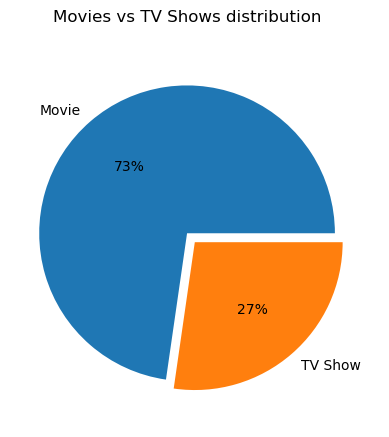

In [153]:
labels=['Movie','TV Show']
plt.pie(df_new.groupby('type')['type'].count(),labels=labels,explode=(0.08,0),autopct='%0.0f%%')
plt.suptitle('Movies vs TV Shows distribution')
plt.show()
            

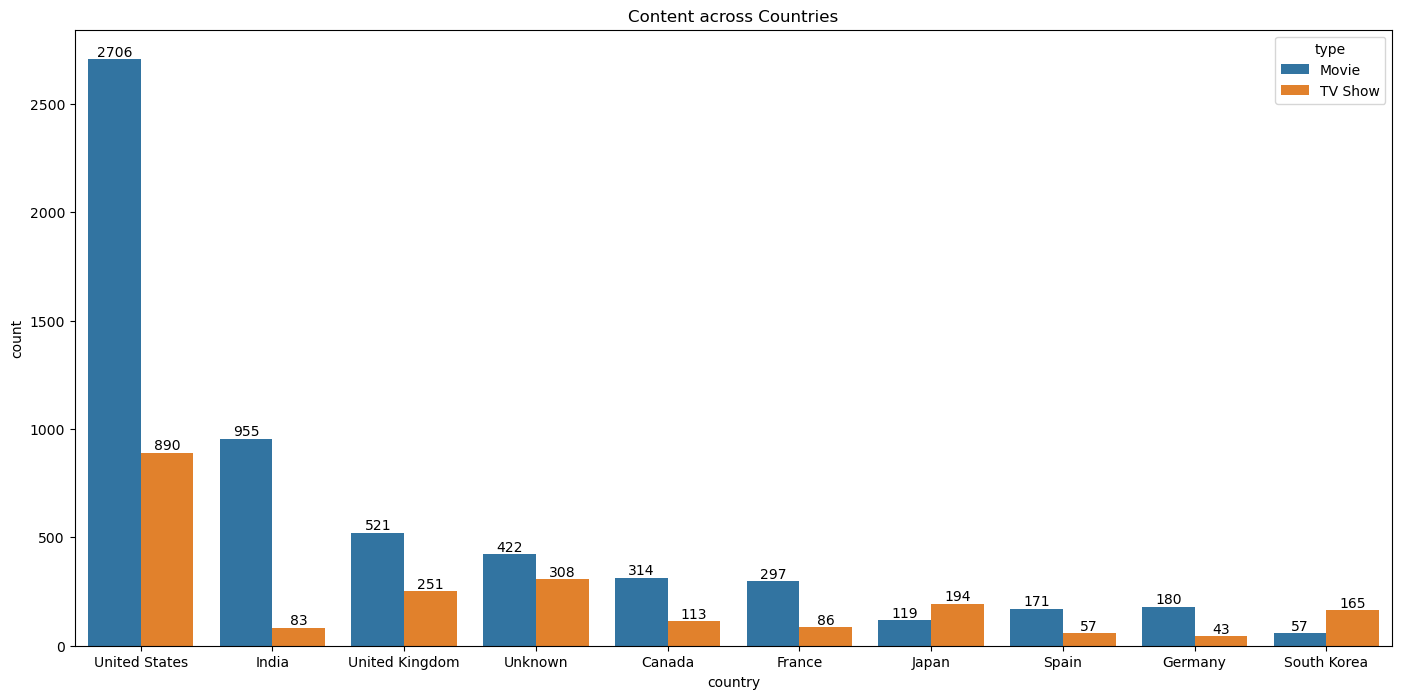

In [154]:
df_temp=df_new.drop_duplicates(subset=['country','title'])
x=df_temp['country'].value_counts().head(10)
plt.figure(figsize=(17,8))
plt.title('Content across Countries')
label=sns.countplot(data=df_temp,x='country',hue='type',order=x.index)
for i in label.containers:
    label.bar_label(i)
plt.show()

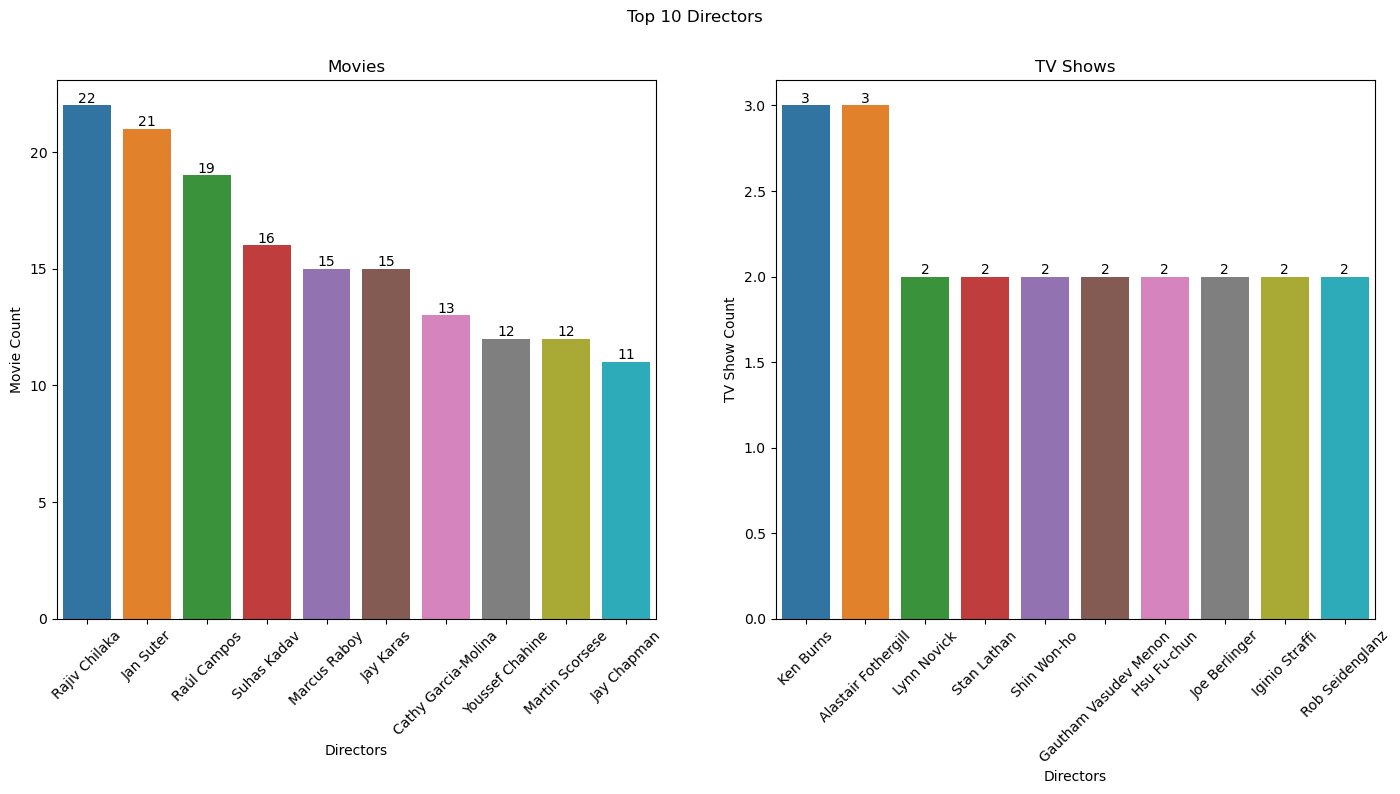

In [155]:
df_movies_temp=df_movies.drop_duplicates(subset=['director','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['director','title'])
plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Directors')
plt.subplot(1,2,1)
label=sns.countplot(data=df_movies_temp,x='director',order=df_movies_temp['director'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('Movie Count')
plt.subplot(1,2,2)
label=sns.countplot(data=df_tvs_temp,x='director',order=df_tvs_temp['director'].value_counts()[1:11].index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Directors')
plt.ylabel('TV Show Count')
plt.show()

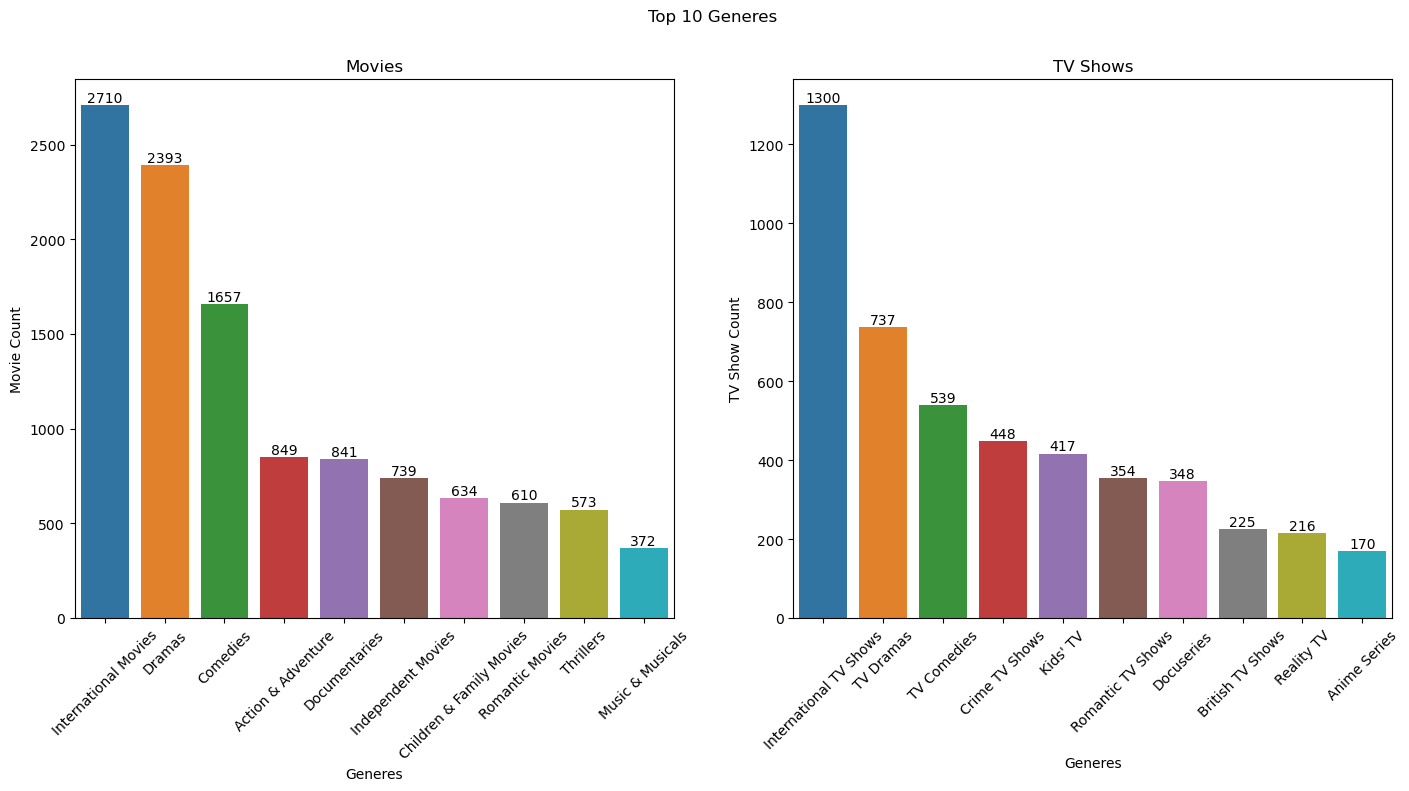

In [156]:
df_movies_temp=df_movies.drop_duplicates(subset=['genere','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['genere','title'])
plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Generes')
plt.subplot(1,2,1)
label=sns.countplot(data=df_movies_temp,x='genere',order=df_movies_temp['genere'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel('Generes')
plt.ylabel('Movie Count')
plt.subplot(1,2,2)
label=sns.countplot(data=df_tvs_temp,x='genere',order=df_tvs_temp['genere'].value_counts().head(10).index)
for i in label.containers:
    label.bar_label(i)
plt.title("TV Shows")
plt.xticks(rotation=45)
plt.xlabel('Generes')
plt.ylabel('TV Show Count')
plt.show()

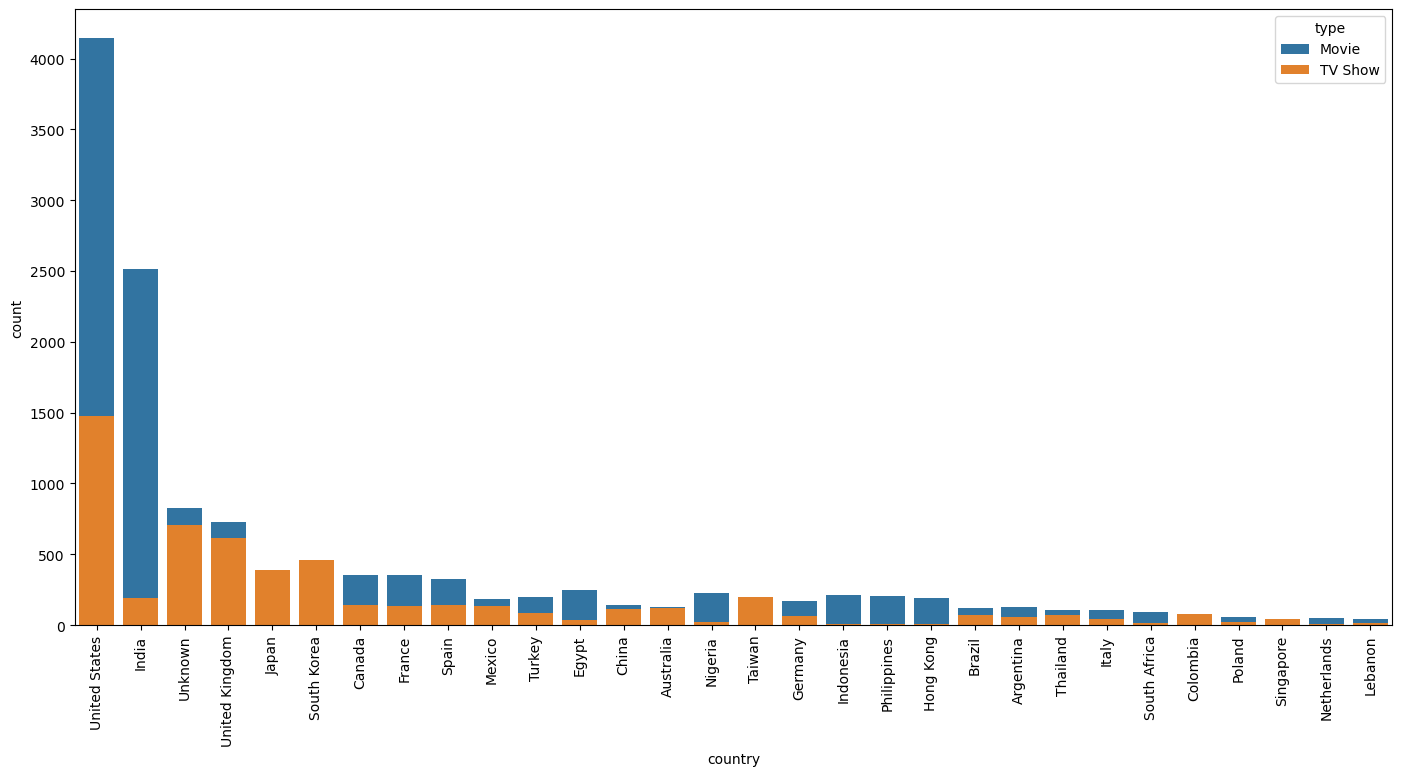

In [157]:
#stackeed graph
df_temp=df_new.drop_duplicates(subset=['genere','title'])
plt.figure(figsize=(17,8))
plt.xticks(rotation=90)
sns.countplot(data=df_temp,x='country',hue='type',dodge=False,order=df_temp['country'].value_counts().head(30).index)
plt.show()

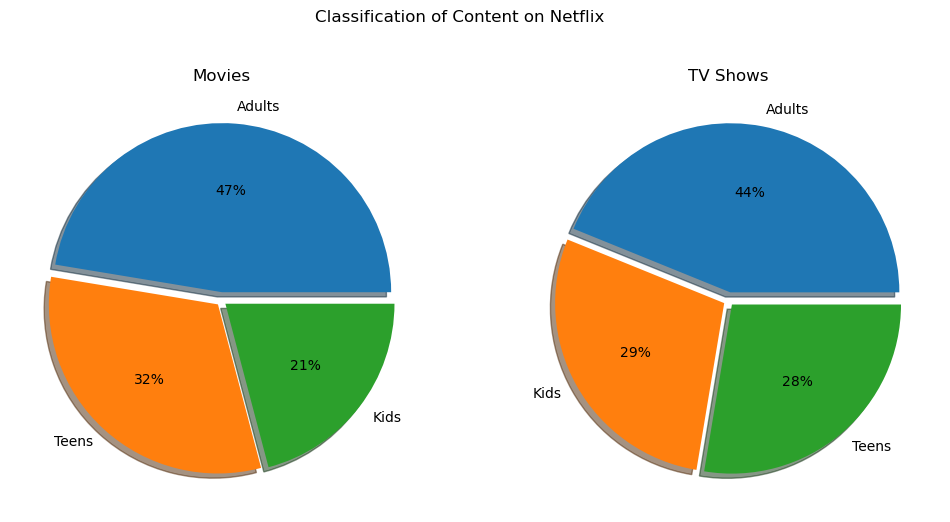

In [158]:
df_movies_temp = df_movies.drop_duplicates(subset = ['rating','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['rating','title'])

plt.figure(figsize = (12,6))
plt.suptitle('Classification of Content on Netflix')

plt.subplot(1,2,1)
plt.pie(df_movies_temp['rating'].value_counts(), labels = df_movies_temp['rating'].value_counts().index, 
        autopct='%.0f%%', explode = (0.05,0.03,0.03), shadow = True)
plt.title('Movies')

plt.subplot(1,2,2)
plt.pie(df_tvs_temp['rating'].value_counts(), labels = df_tvs_temp['rating'].value_counts().index,
        autopct='%.0f%%', explode = (0.05,0.03,0.03), shadow = True)
plt.title('TV Shows')

plt.show()

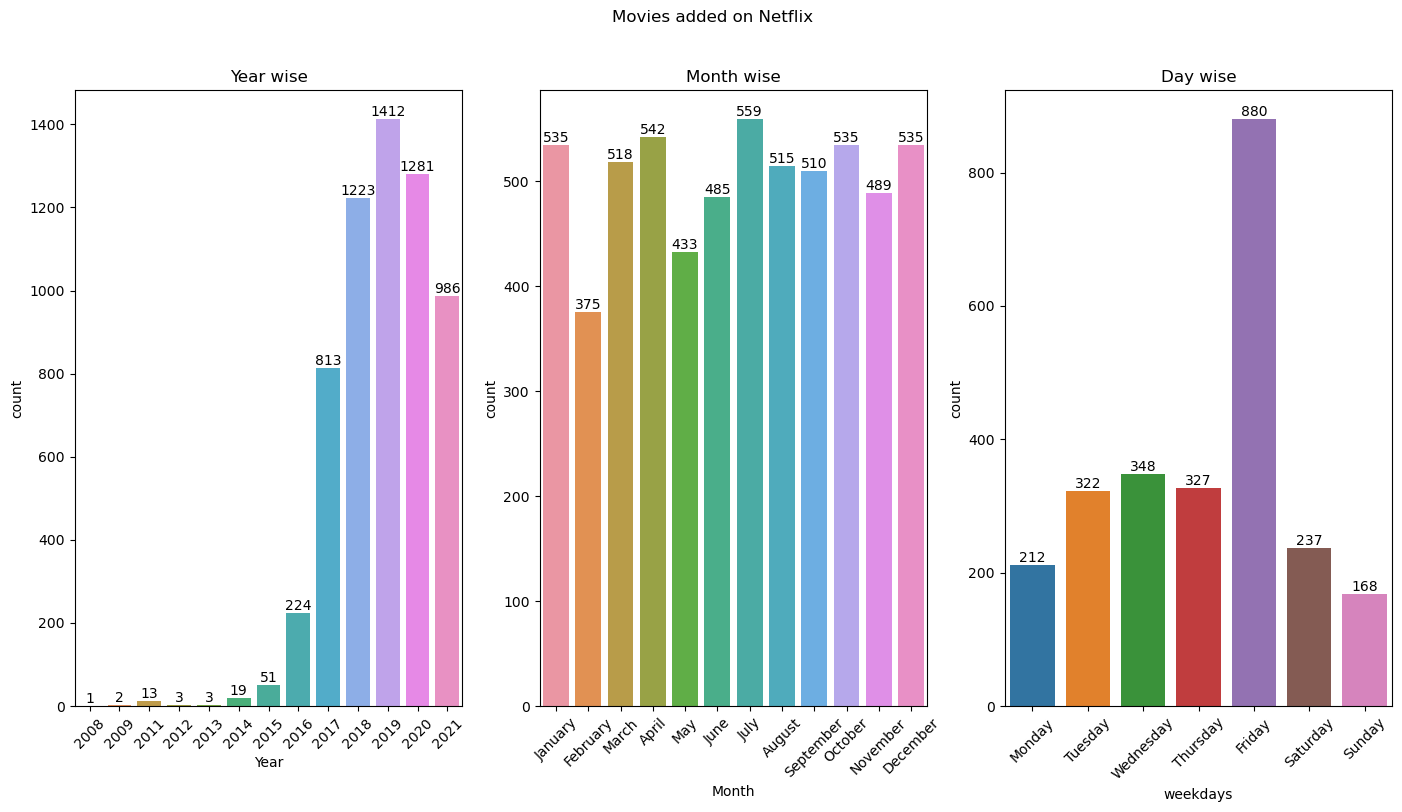

In [159]:
df_movies_temp=df_movies.drop_duplicates(subset=['year','title'])
mv_year=df_movies_temp['year'].value_counts()
mv_year.sort_index(inplace=True)
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
mv_month=df_movies_temp['month_name'].value_counts().loc[month_order]
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day=df_movies_temp['weekdays'].value_counts().loc[day_order]
plt.figure(figsize=(17,8))
plt.suptitle('Movies added on Netflix')
plt.subplot(1,3,1)
label=sns.countplot(data=df_movies_temp,x='year',order=mv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')
plt.subplot(1,3,2)
label=sns.countplot(data=df_movies_temp,x='month_name',order=mv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')
plt.subplot(1,3,3)
label=sns.countplot(data=df_tvs_temp,x='weekdays',order=mv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('weekdays')
plt.title('Day wise')
plt.show()



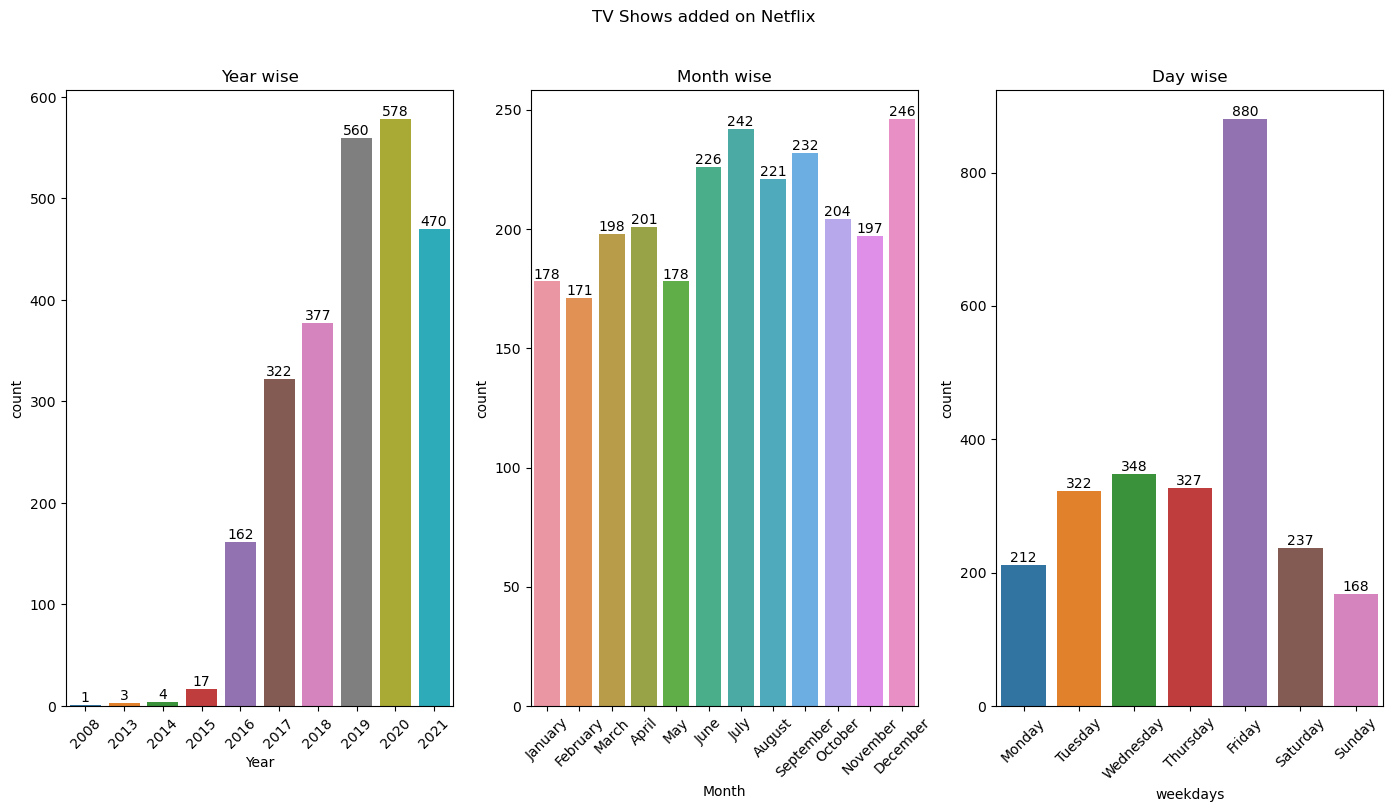

In [160]:
df_tvs_temp=df_tvs.drop_duplicates(subset=['year','title'])
tv_year=df_tvs_temp['year'].value_counts()
tv_year.sort_index(inplace=True)
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
tv_month=df_tvs_temp['month_name'].value_counts().loc[month_order]
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tv_day=df_tvs_temp['weekdays'].value_counts().loc[day_order]
plt.figure(figsize=(17,8))
plt.suptitle('TV Shows added on Netflix')
plt.subplot(1,3,1)
label=sns.countplot(data=df_tvs_temp,x='year',order=tv_year.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year wise')
plt.subplot(1,3,2)
label=sns.countplot(data=df_tvs_temp,x='month_name',order=tv_month.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month wise')
plt.subplot(1,3,3)
label=sns.countplot(data=df_tvs_temp,x='weekdays',order=tv_day.index)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('weekdays')
plt.title('Day wise')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


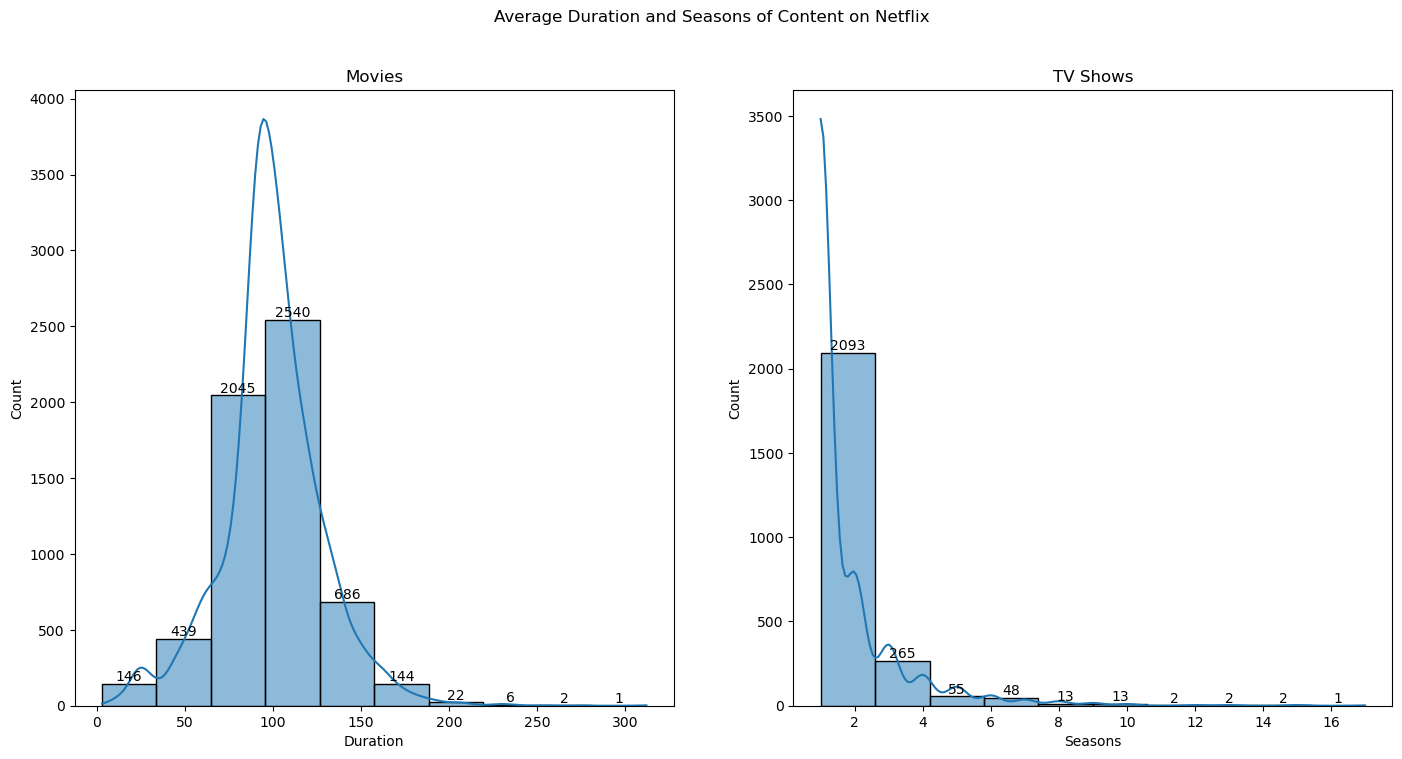

In [161]:
df_movies_temp=df_movies.drop_duplicates(subset=['duration','title'])
df_tvs_temp=df_tvs.drop_duplicates(subset=['seasons','title'])
plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')
plt.subplot(1,2,1)
label=sns.histplot(df_movies_temp['duration'].astype(int),bins=10,kde=True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Duration')
plt.title('Movies')
plt.subplot(1,2,2)
label=sns.histplot(df_tvs_temp['seasons'].astype(int),bins=10,kde=True)
for i in label.containers:
    label.bar_label(i)
plt.xlabel('Seasons')
plt.title('TV Shows')
plt.show()
